## Word segmentation

conclusion: This algorithm will not work for the word segmentation

In [3]:
# path = r"D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper\\"
path = "D:\Digital Image Processing\Project\git_hub\DIP_Project\line_imgs_paper\\"
import cv2
import numpy as np
import matplotlib.pyplot as plt

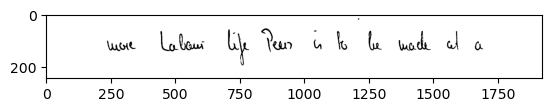

In [4]:
plt.imshow(cv2.imread(path+"a01-000x_2.png", cv2.IMREAD_GRAYSCALE), cmap='gray')


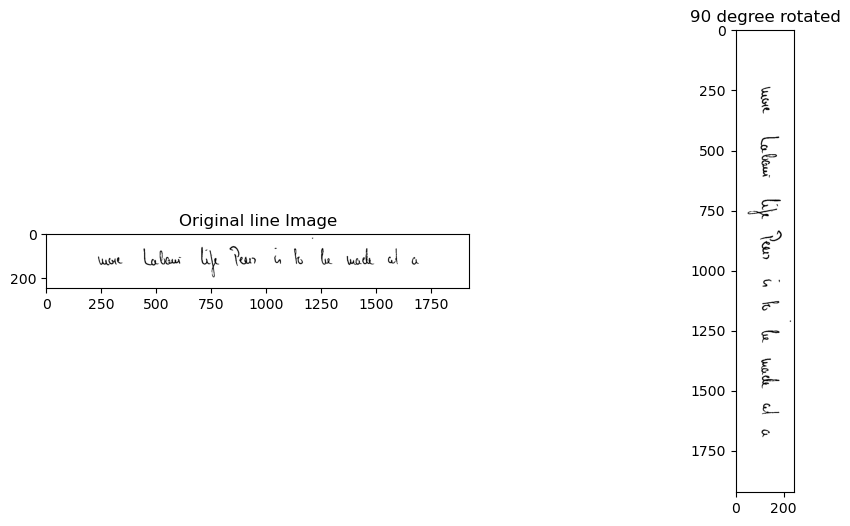

In [5]:
image = cv2.imread(path+"a01-000x_2.png", cv2.IMREAD_GRAYSCALE)

rotated_image = np.transpose(image, (1, 0))  # Transpose the rows and columns
rotated_image = np.flip(rotated_image, axis=1)  # Flip along the vertical axis
image = rotated_image
# plt.imshow(image, cmap='gray')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original line Image")
plt.imshow(cv2.imread(path+"a01-000x_2.png", cv2.IMREAD_GRAYSCALE), cmap='gray')

plt.subplot(1, 2, 2)
plt.title("90 degree rotated")
plt.imshow(image, cmap='gray')
plt.show()

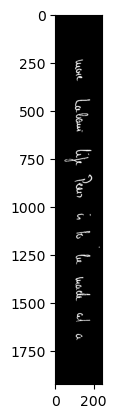

Average width of components: 47.22727272727273


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image

# Binarize the image
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.show()
# Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image)

# Calculate the average width of components
component_widths = stats[1:, cv2.CC_STAT_WIDTH]  # Exclude the background
average_width = np.mean(component_widths)
print(f"Average width of components: {average_width}")


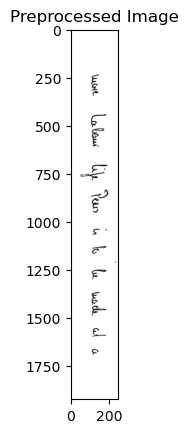

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Display the preprocessed image
plt.imshow(blurred, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


In [8]:
component_widths

array([ 40,  29,  78,  64,   5,  80,   7, 123,  50,  54,  35,  27,  37,
         5,  72,   5,  75,  41,  74,  32,  72,  34], dtype=int32)

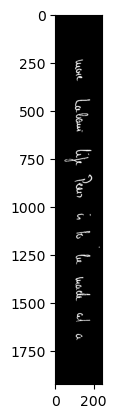

Average width of components: 47.22727272727273


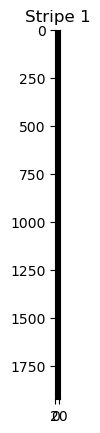

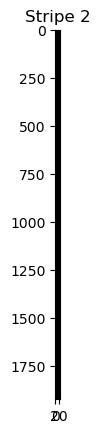

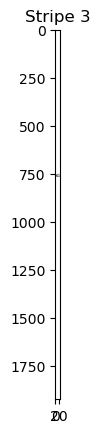

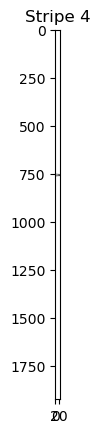

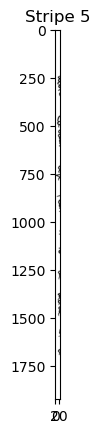

In [9]:
# Calculate connected components
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image, cmap='gray')
plt.show()
# Find connected components
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image)

# Calculate the average width of components
component_widths = stats[1:, cv2.CC_STAT_WIDTH]  # Exclude the background
average_width = np.mean(component_widths)
print(f"Average width of components: {average_width}")

stripe_width = int(average_width/2)

# Split image into vertical stripes
height, width = blurred.shape
stripes = [blurred[:, i:i + stripe_width] for i in range(0, width, stripe_width)]

# Visualize a few stripes
for idx, stripe in enumerate(stripes[:5]):
    plt.imshow(stripe, cmap='gray')
    plt.title(f"Stripe {idx + 1}")
    plt.show()


stripe_width = int(average_width/2) - for word segmentation  
stripe_width = int(average_width) - for line segmentation

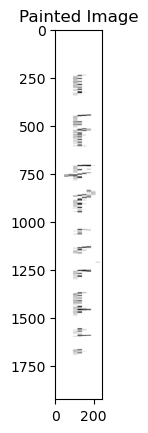

In [10]:
painted_image = np.zeros_like(blurred)

for i, stripe in enumerate(stripes):
    for row in range(stripe.shape[0]):
        avg_gray = np.mean(stripe[row, :])
        stripe[row, :] = avg_gray
    painted_image[:, i * stripe_width:(i + 1) * stripe_width] = stripe

# Display the painted image
plt.imshow(painted_image, cmap='gray')
plt.title("Painted Image")
plt.show()


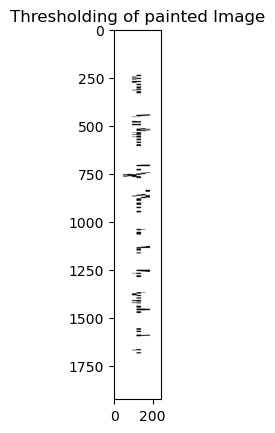

In [11]:
# Apply Otsu's thresholding
_, binary_image = cv2.threshold(painted_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title("Thresholding of painted Image")
plt.show()


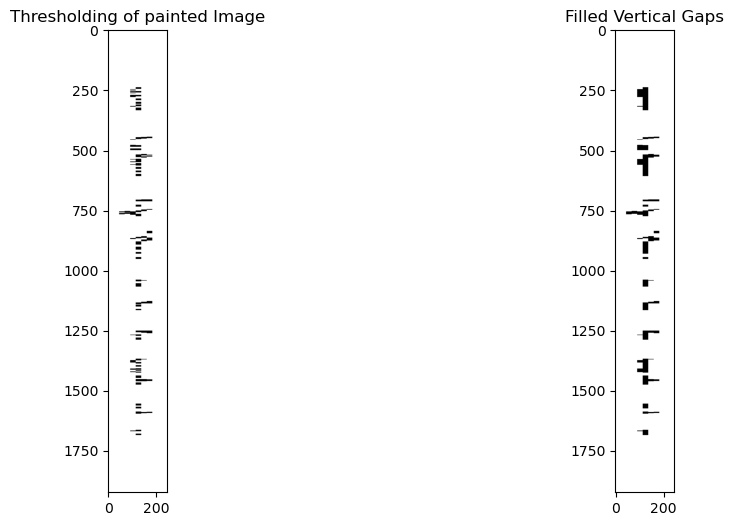

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fill_vertical_gaps(image, gap_threshold):
    filled_image = image.copy()
    rows, cols = filled_image.shape

    for col in range(cols):
        start = None
        for row in range(rows):
            # Identify black regions (0) with white gaps (255)
            if filled_image[row, col] == 0:
                if start is not None:
                    # If a gap is detected between two black regions
                    gap_height = row - start - 1
                    if gap_height > 0 and gap_height <= gap_threshold:
                        # Fill the gap with black (0) if within the threshold
                        filled_image[start + 1:row, col] = 0
                start = row  # Update the start position

    return filled_image

# Define the vertical gap threshold
gap_threshold = 10  # Adjust based on your dataset

# Apply the vertical gap filling function
filled_image = fill_vertical_gaps(binary_image, gap_threshold)

# Display the original and filled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Thresholding of painted Image")
plt.imshow(binary_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Vertical Gaps")
plt.imshow(filled_image, cmap='gray')
plt.show()


In [78]:
# # algorithem which can remove the portion of black box or trim it if it's hight is more than thresold and
# # width should be the strip size
# threshold_width=4*stripe_width
# sum_s = 1
# filled_image_n=filled_image.copy()
# for i in range(0, filled_image.shape[1], stripe_width):
#     for j in range(0, filled_image.shape[0]-threshold_width):
#         sum_s = np.sum(filled_image[j:j+threshold_width, i:i + stripe_width])
#         if sum_s<=0:
#             filled_image_n[j:j+threshold_width, i:i + stripe_width]=255
        
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.title("Filled Vertical Gaps")
# plt.imshow(filled_image, cmap='gray')

# plt.subplot(1, 2, 2)
# plt.title("Filled Vertical gap thresolded")
# plt.imshow(filled_image_n, cmap='gray')
# plt.show()


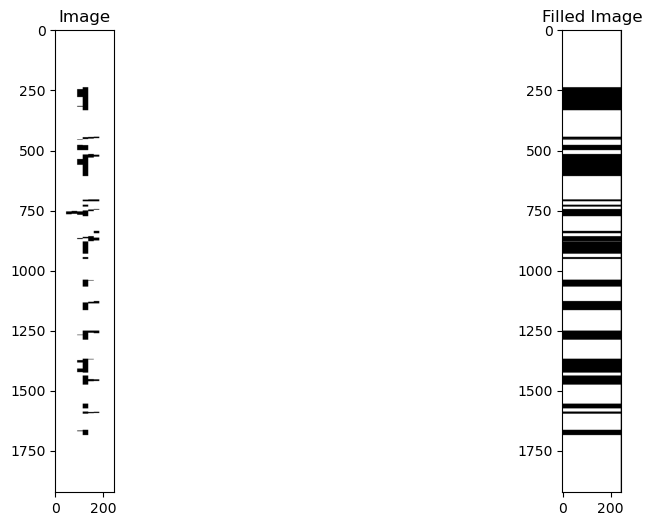

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# binary_image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure it's a binary image
# _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY)

# Function to fill white gaps between black regions
def fill_white_gaps(image, gap_threshold):
    filled_image = image.copy()
    rows, cols = filled_image.shape
    filled_image[:,-1]=0
    filled_image[:,0]=0
    for row in range(rows):
        start = None
        for col in range(cols):
            # Identify black regions (0) with white gaps (255)
            if filled_image[row, col] == 0:
                if start is not None:
                    # If a gap is detected between two black regions
                    gap_width = col - start - 1
                    if gap_width > 0 and gap_width <= gap_threshold:
                        # Fill the gap with black (0) if within the threshold
                        filled_image[row, start + 1:col] = 0
                start = col  # Update the start position

    return filled_image

# Define the gap threshold
# gap_threshold = stripe_width*4  # Adjust based on your dataset
gap_threshold =  filled_image.shape[1]/1.5# Adjust based on your dataset

# Apply the gap filling function
filled_image_n_n = fill_white_gaps(filled_image, gap_threshold)

# Display the original and filled images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Image")
plt.imshow(filled_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filled Image")
plt.imshow(filled_image_n_n, cmap='gray')
plt.show()


In [14]:
filled_image.shape

(1923, 245)

Ensure you have OpenCV with ximgproc module installed. Falling back to custom thinning.


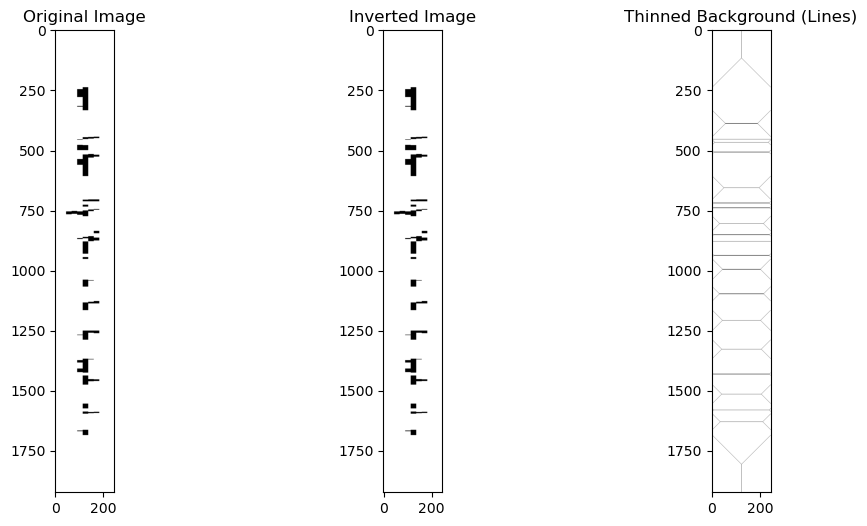

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# Ensure the image is binary
# _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Invert the binary image to focus on the background
# inverted_image = cv2.bitwise_not(filled_image_n_n)

# Apply skeletonization (thinning) to the inverted image
# Ensure OpenCV's ximgproc module is available
try:
    skeleton = cv2.ximgproc.thinning(inverted_image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)
except AttributeError:
    print("Ensure you have OpenCV with ximgproc module installed. Falling back to custom thinning.")

    # Custom thinning method (basic iterative approach)
    def skeletonize(img):
        skel = np.zeros_like(img)
        eroded = np.zeros_like(img)
        temp = np.zeros_like(img)

        while True:
            # Erode the image
            eroded = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
            temp = cv2.dilate(eroded, cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3)))
            temp = cv2.subtract(img, temp)
            skel = cv2.bitwise_or(skel, temp)
            img = eroded.copy()

            if cv2.countNonZero(img) == 0:
                break

        return skel

    skeleton = skeletonize(filled_image_n_n)

# Invert the result back to represent thinned background
thinned_background = cv2.bitwise_not(skeleton)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(filled_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Inverted Image")
plt.imshow(filled_image, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Thinned Background (Lines)")
plt.imshow(thinned_background, cmap='gray')

plt.show()


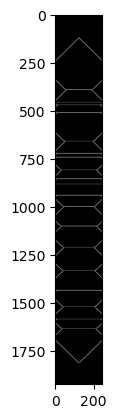

In [16]:
# Invert the image to make lines white and background black
inverted_image = cv2.bitwise_not(thinned_background)

# Define the horizontal Sobel-like filter
H = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]], dtype=np.float32)

# Apply the horizontal filter
for i in range(4):
    filtered_image = cv2.filter2D(inverted_image, -1, H)
    inverted_image=filtered_image
# Normalize and threshold the result
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
_, thresholded_image = cv2.threshold(filtered_image, 50, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image, cmap='gray')

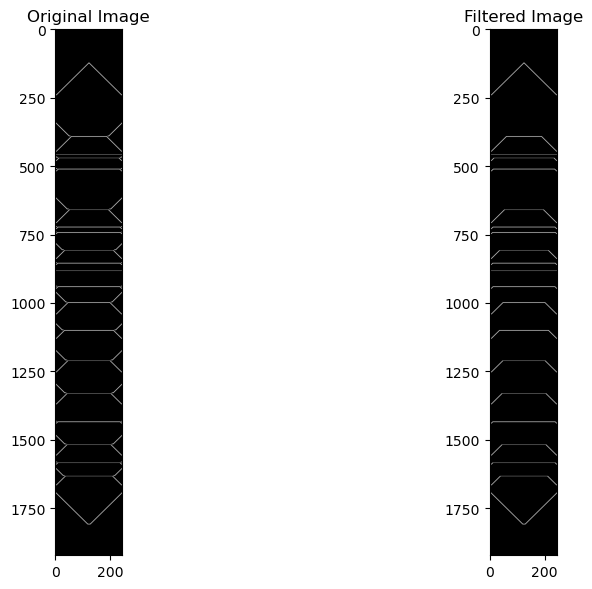

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
inverted_image = cv2.bitwise_not(thinned_background)
H = np.array([[1, 2, 1],
              [0, 0, 0],
              [-1, -2, -1]], dtype=np.float32)

# Apply the horizontal filter
for i in range(4):
    filtered_image = cv2.filter2D(inverted_image, -1, H)
    inverted_image=filtered_image
# Normalize and threshold the result
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
_, thresholded_image = cv2.threshold(filtered_image, 50, 255, cv2.THRESH_BINARY)
# Ensure the image is binary
# _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Perform connected component analysis
num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(thresholded_image, connectivity=8)

# Get image dimensions
image_height, image_width = thresholded_image.shape

# Minimum line length (1/5th of image width)
min_length = image_width / 1.5

# Create an empty mask for the filtered image
filtered_image = np.zeros_like(thresholded_image)

# Loop through each component
for i in range(1, num_labels):  # Skip the background (label 0)
    x, y, w, h, area = stats[i]  # Bounding box and area
    if w > min_length:  # Keep only components with width greater than min_length
        filtered_image[labels == i] = 255

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(inverted_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Filtered Image")
plt.imshow(filtered_image, cmap='gray')

plt.tight_layout()
plt.show()


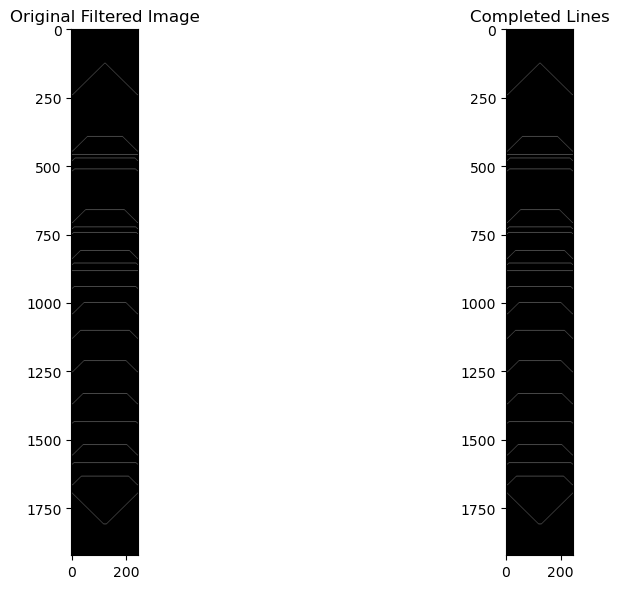

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize


def find_endpoints(skeleton):
    """
    Find endpoints of a skeletonized binary image and determine their direction 
    (left or right) based on neighboring points.

    Args:
    - skeleton (numpy.ndarray): Skeletonized binary image.

    Returns:
    - endpoints (list): List of tuples (x, y, direction) where direction is determined by neighbors.
    - n_lines (int): Number of lines removed due to the filtering condition.
    """
    kernel = np.array([[1, 1, 1],
                       [1, 10, 1],
                       [1, 1, 1]], dtype=np.uint8)
    
    # Convolution to find neighbors of each pixel
    neighbors = cv2.filter2D(skeleton.astype(np.uint8), -1, kernel)
    
    # Identify endpoints (pixels with exactly one neighbor)
    endpoints = np.where((neighbors == 11) & (skeleton == 1))
    
    # Convert to list of (x, y) coordinates
    endpoints_n = list(zip(endpoints[1], endpoints[0]))
    # print('Before filtering:', endpoints_n)
    
    # Filter endpoints based on their x-coordinate
    endpoints_filtered = [endpoint for endpoint in endpoints_n if endpoint[0] > (skeleton.shape[0] / 10)]
    
    # Determine the direction of each endpoint
    endpoints_with_direction = []
    for endpoint in endpoints_filtered:
        x, y = endpoint
        
        # Check 8-connected neighbors
        neighbor_offsets = [(-1, -1), (-1, 0), (-1, 1),
                            (0, -1),         (0, 1),
                            (1, -1), (1, 0), (1, 1)]
        neighbor_offsets=1*neighbor_offsets
        neighbors = []
        for dx, dy in neighbor_offsets:
            nx, ny = x + dx, y + dy
            if 0 <= ny < skeleton.shape[0] and 0 <= nx < skeleton.shape[1] and skeleton[ny, nx] == 1:
                neighbors.append((nx, ny))
        
        # Determine the direction based on the position of the neighbor
        if neighbors:
            # print(neighbors)
            # Calculate the vector between the endpoint and the neighbor
            neighbor = neighbors[0]  # Take the first neighbor (assumes a single path)
            dx = x-neighbor[0] 
            dy = y-neighbor[1]
            
            # Determine direction
            if dx<0:  # Horizontal component dominates
                direction = 0 #'right'
            else:  # Vertical component dominates (for future modifications if needed)
                direction = 1 #'left'
        else:
            # print('No neighbours')
            direction = 0 #'undefined'  # Fallback if no valid neighbors are found
        
        endpoints_with_direction.append((x, y, direction))
    
    # print('After filtering with direction:', endpoints_with_direction)
    
    # Calculate number of removed lines
    n_lines = len(endpoints_n) - len(endpoints_filtered)
    
    return endpoints_with_direction, n_lines


def extend_horizontally(image, x, y, direction, max_length=50):
    """
    Extend the line horizontally from (x, y) in the given direction.
    """
    for i in range(1, max_length + 1):
        new_x = x + i * direction  # Extend horizontally
        if new_x < 0 or new_x >= image.shape[1]:
            break  # Stop if reaching the boundary
        if (y+1)<image.shape[0] and (new_x+1)<image.shape[1]:
            if image[y+1,new_x+1]!=0 or image[y,new_x+1]!=0 or image[y-1,new_x+1]!=0:
                if image[y+1,new_x+1]!=0:
                    y= y-1
                if image[y,new_x+1]!=0:
                    y= y-2
                if image[y-1,new_x+1]!=0:
                    y= y+1

            else:
                image[y, new_x] = 1  # Set pixel value to white


    return image

def connect_lines(image, endpoints,n_lines, max_distance):
    """
    Connect nearby endpoints or extend lines horizontally if no match is found.
    """
    v_threshold = image.shape[0]/(n_lines*(1.2))
    image_n = image.copy()
    used = set()  # Track used endpoints
    for i, (x1, y1,direction) in enumerate(endpoints):
        if i in used:
            continue
        for j, (x2, y2,d) in enumerate(endpoints):
            if i != j and j not in used:
                distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
                # print('yes',abs(y1 - y2),distance)

                if distance < max_distance and abs(y1 - y2) < v_threshold and d==0 and direction==1:  # Allow only horizontal-ish connecti
                    # print('yes',abs(y1 - y2),distance)
                    cv2.line(image_n, (x1, y1), (x2, y2), 1, 1)
                    used.add(i)
                    used.add(j)
                    break
        else:
            # If no match, extend the line horizontally
            if direction==1:
            # direction = 0 if x1 < image_n.shape[1] // 2 else 1  # Left or right
                # print(x1,y1,image.shape[1]-x1)
                image_n = extend_horizontally(image_n, x1, y1, direction,max_length= image.shape[1]-x1)
    return image_n

# Load the filtered binary image
# image = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(filtered_image, 127, 255, cv2.THRESH_BINARY)

# Skeletonize the image
skeleton = skeletonize(binary_image // 255).astype(np.uint8)

# Detect endpoints
endpoints,n_lines = find_endpoints(skeleton)
# print(endpoints,n_lines)
# Define maximum connection distance (1/10th of image width)
image_height, image_width = skeleton.shape
max_distance = image_width / 10

# Connect endpoints and extend lines horizontally
if n_lines!=0:
    completed_image = connect_lines(skeleton, endpoints, n_lines, max_distance)
else:
    completed_image=skeleton

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Filtered Image")
plt.imshow(skeleton, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Completed Lines")
plt.imshow(completed_image, cmap='gray')

plt.tight_layout()
plt.show()


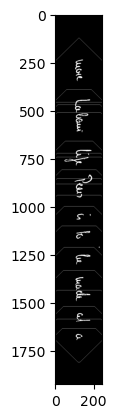

In [19]:
# image = cv2.imread(path+'5.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(binary_image+255*completed_image, cmap='gray')

[[    0     0    52   640 32968]
 [    0     4    52    18    52]
 [    0    51    52    13    52]
 [    0   235    52    16    52]
 [    0   283    52    15    52]
 [    0   326    52    12    52]
 [    0   445    52    11    52]]
number of lines: 6
[ 0  4 52 18 52] [0, 51, 52, 13]


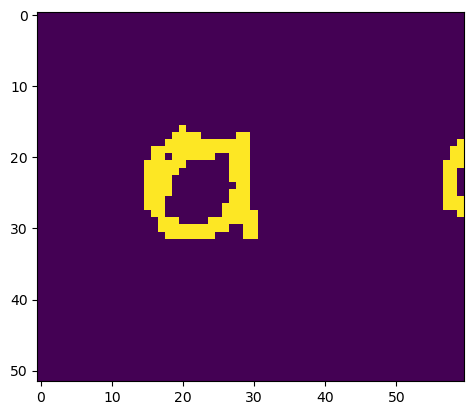

Saved: D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper_words\\0.png
[ 0 51 52 13 52] [0, 235, 52, 16]


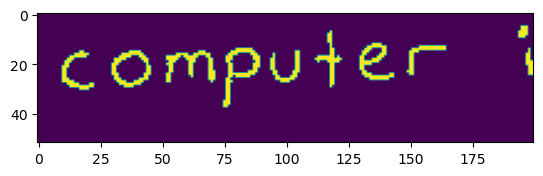

Saved: D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper_words\\1.png
[  0 235  52  16  52] [0, 283, 52, 15]


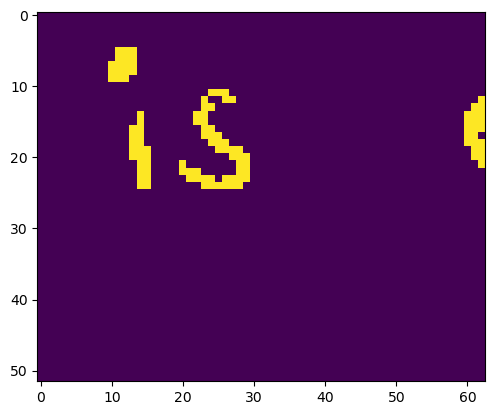

Saved: D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper_words\\2.png
[  0 283  52  15  52] [0, 326, 52, 12]


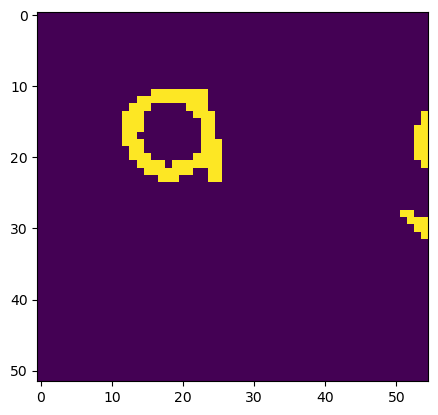

Saved: D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper_words\\3.png
[  0 326  52  12  52] [0, 445, 52, 11]


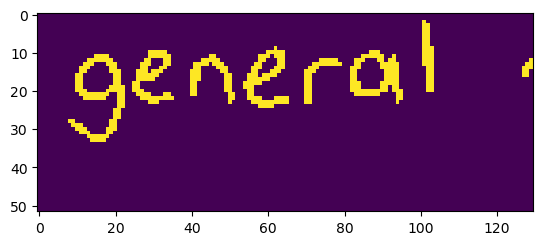

Saved: D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper_words\\4.png
[  0 445  52  11  52] [0, 640, 52, 1]


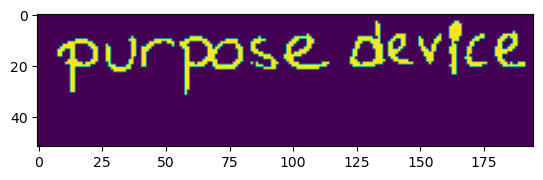

Saved: D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper_words\\5.png


In [68]:
import os
import cv2
import numpy as np

def crop_and_save_lines(text_image, lines_binary_image, output_folder):

    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Find connected components in the binary lines image
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(lines_binary_image.astype(np.uint8), connectivity=8)
    # print(stats[:,2])
    # Get the maximum width of all the lines
    max_line_width = 0
    for stat in stats[1:]:  # Skip the background label
        max_line_width = max(max_line_width, stat[2])  # Width is the 3rd element in 'stat'
    
    # Iterate through each line component
    print(stats)
    stats_n=[]
    for i in range(1, num_labels):  # Skip the background label (0)
        x, y, w, h, _ = stats[i]

        if w> lines_binary_image.shape[1]/2.5:
            stats_n.append(stats[i])

    print('number of lines:',len(stats_n))
    min_line_width = text_image.shape[0]/(len(stats_n)*4)
    for i in range(len(stats_n)):

        # if i!=2:
        #     continue

        x1, y1, w1, h1, _ = stats_n[i]
        if i==(len(stats_n)-1):
            x2, y2, w2, h2 =0, text_image.shape[0],text_image.shape[1],1
        else:
            x2, y2, w2, h2, _ = stats_n[i+1]


        print(stats_n[i],[x2, y2, w2, h2])
 
        cropped_line = text_image[y1:y2+h2, :].copy()
        line_mask = lines_binary_image[y1:y2+h2, :].copy()
        if i==(len(stats_n)-1):
            line_mask[-1]=1
        plt.imshow(line_mask)
        plt.show()
        # print(line_mask.shape)
        # cv2.bitwise_not(skeleton)
        for c in range(line_mask.shape[1]):
            s_p=None
            e_p =0
            for j in range(line_mask.shape[0]):
                if s_p == None and line_mask[j,c]==1:
                    s_p= j
                    # print('sp',j)
                if s_p != None and line_mask[j,c]==1 and j>(s_p+min_line_width):
                    e_p=j
                    # print(j)
            line_mask[s_p:e_p,c]=1
        cropped_line_n = cropped_line*line_mask
        plt.imshow(line_mask)
        plt.show()
        print(cropped_line_n.shape)
        
        # if i==2:
        #     break
        line_image_path=output_folder+f'{i}.png'

        cropped_line_n = np.transpose(cropped_line_n, (1, 0))  # Transpose the rows and columns
        cropped_line_n = np.flip(cropped_line_n, axis=0)  # Flip along the vertical axis
        # cv2.imwrite(line_image_path, cropped_line_n)
        cv2.imwrite(line_image_path,cv2.bitwise_not(cropped_line_n) )

        plt.imshow(cropped_line_n)
        plt.show()
        print(f"Saved: {line_image_path}")
        # return num_labels, labels, stats,cropped_line.shape

output_folder = r"D:\Digital Image Processing\Project\Project_code_folder\line_imgs_paper_words\\"

# image = cv2.imread(path+'5.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
completed_image_c = completed_image.copy()
crop_and_save_lines(binary_image, completed_image_c, output_folder)

In [63]:
binary_image.shape

(640, 55)